하이퍼파라미터 튜닝은 정지규칙 값들을 설정하는 것을 의미합니다. 의사결정나무에는 정지규칙(stopping criteria) 이라는 개념이 있는데 오늘 소개해드릴 4가지 정지규칙은

최대깊이 (max_depth) : 최대로 내려갈 수 있는 depth 입니다. 뿌리 노드로부터 내려갈 수 있는 깊이를 지정하며 작을수록 트리는 작아지게 됩니다.
최소 노드크기(min_samples_split) : 노드를 분할하기 위한 데이터 수 입니다. 해당 노드에 이 값보다 적은 확률변수 수가 있다면 stop. 작을수록 트리는 커지게 됩니다.
최소 향상도(min_impurity_decrease) : 노드를 분할하기 위한 최소 향상도 입니다. 향상도가 설정값 이하라면 더 이상 분할하지 않습니다. 작을수록 트리는 커집니다.

비용복잡도(Cost-complexity) : 트리가 커지는 것에 대해 패널티 계수를 설정해서 불순도와 트리가 커지는 것에 대해 복잡도를 계산하는 것입니다.

이와 같은 정지규칙들을 종합적으로 고려해 최적의 조건값을 설정할 수 있으며 이를 하이퍼파라미터 튜닝이라고 합니다.

**1. Grib Search**

에 대한 자세한 내용은 해당 코랩 파일 참조

하이퍼파라미터 튜닝에는 다양한 방법론이 있습니다. 그 중 Best 성능을 나타내는 GridSearch는 완전 탐색(Exhaustive Search) 을 사용합니다. 가능한 모든 조합 중에서 가장 우수한 조합을 찾아줍니다. 하지만, 완전 탐색이기 때문에 Best 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있습니다.

from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor(criterion = 'mse', random_state=2020)


params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}


greedy_CV = GridSearchCV(model, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV.fit(X_train, Y_train)

**2. Random Search**

에 대한 자세한 내용은 나중에 찾아볼게

**3. Bayesian Optimization**

이번은 "Bayesian Optimization"입니다.



Bayesian Optmization은 하이퍼 파라미터 튜닝과 관련된 내용입니다.

우리가 흔히 알고 있는 하이퍼 파라미터 튜닝은 Grid Search, Random Search입니다.

하지만 그 2가지에는 공통적인 문제점이 있습니다.

"최적의 값을 찾아갈 수 없다"라는 문제점입니다.



이를 해결하기 위한 방법 중 하나가 "Bayesian Optimization"입니다.

Bayesian Optimization은 보통 

"Gausain Process"라는 통계학을 기반으로 만들어진 모델로, 
여러개의 하이퍼 파라미터들에 대해서,
"Aqusition Fucntion"을 적용했을 때,
"가장 큰 값"이 나올 확률이 높은 지점을 찾아냅니다.
자세한 수식과 증명은 생략하겠습니다.



우리가 다룰 Bayesian Optimization 패키지에서는 (링크)

다음과 같은 단계가 필요합니다.

변경할 하이퍼 파라미터의 범위를 설정한다.
Bayesian Optimization 패키지를 통해, 하이퍼 파라미터의 범위 속 값들을 랜덤하게 가져온다.
처음 R번은 정말 Random하게 좌표를 꺼내 성능을 확인한다.
이후 B번은 Bayesian Optimization을 통해 B번만큼 최적의 값을 찾는다. 


이번 시간에서는 Bayesian Optimization을 실습해보겠습니다.



---------------------------------------------------------------------------------------------------

# bayesian-optimization을 설치해보세요

pip install bayesian-optimization



# bayes_opt 패키지에서 BayesianOptimization을 불러와보세요

from bayes_opt import BayesianOptimization

# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5 .모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {

              'max_depth' : int(round(max_depth)),

               'n_estimators' : int(round(n_estimators)),      

              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)



# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장해보세요

max_params = BO_rf.max['params']

max_params['max_depth'] = int(max_params['max_depth'])

max_params['n_estimators'] = int(max_params['n_estimators'])

print(max_params)



# Bayesian Optimization의 결과를 "BO_tuend_rf"라는 변수에 저장해보세요

BO_tuend_rf = RandomForestClassifier(**max_params)

이번 시간에는 Hyper Parameter의 3가지 튜닝 방법을 비교해보겠습니다.



1.Grid Search
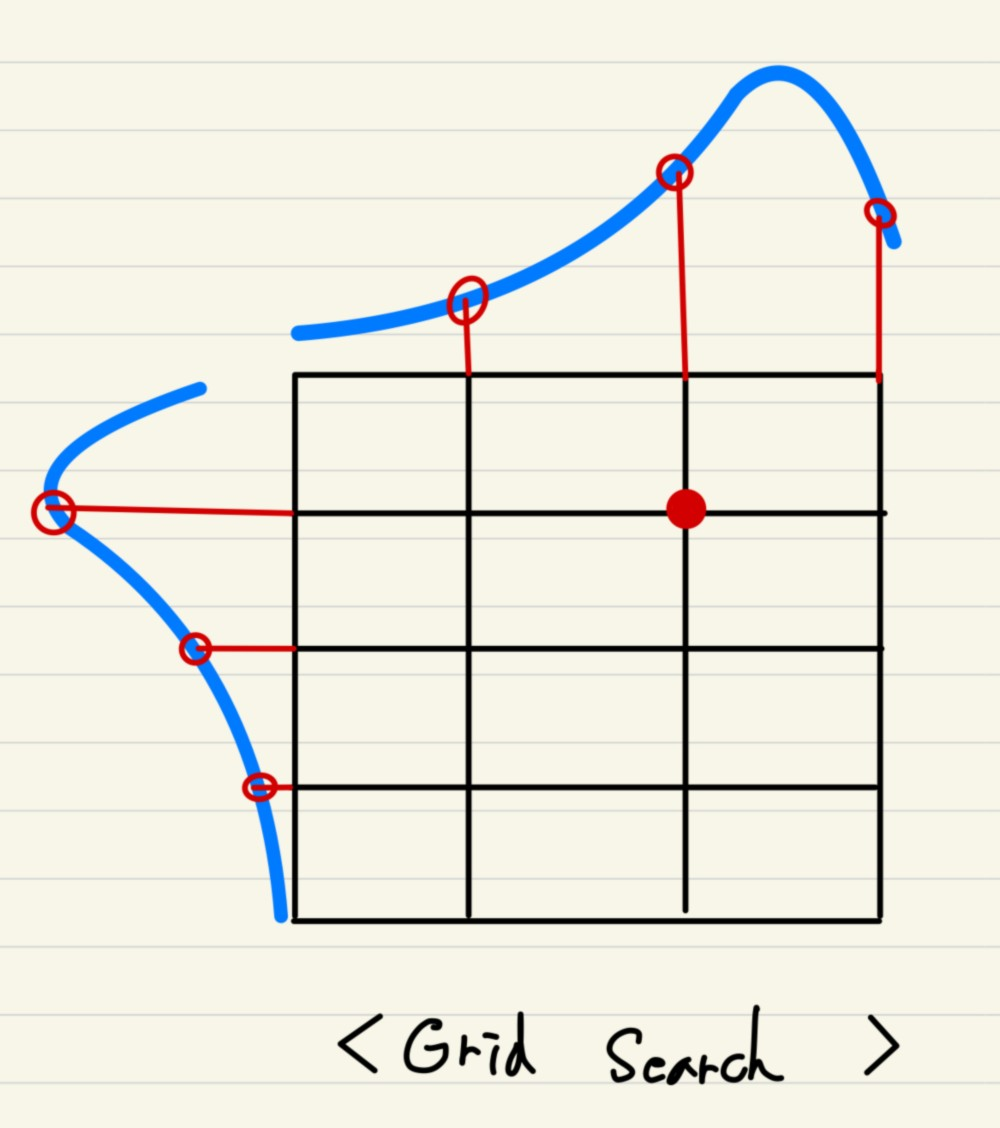


기법 :  Grid Search는 사전에 탐색할 값들을 미리 지정해주고, 그 값들의 모든 조합을 바탕으로 성능의 최고점을 찾아냅니다.
장점 : 
내가 원하는 범위를 정확하게 비교 분석이 가능하다.
단점 : 
시간이 오래걸린다.
						(4개의 파라미터에 대해서, 4가지 값들을 지정해두고, 한 번 탐색하는데 1분이 걸린다면 -> 4*4*1분 = 16분 소요)

성능의 최고점이 아닐 가능성이 높다.
"최적화 검색" (여러개들을 비교 분석해서 최고를 찾아내는 기법)이지, "최적화 탐색"(성능이 가장 높은 점으로 점차 찾아가는 기법)이 아니다.

2.Random Search
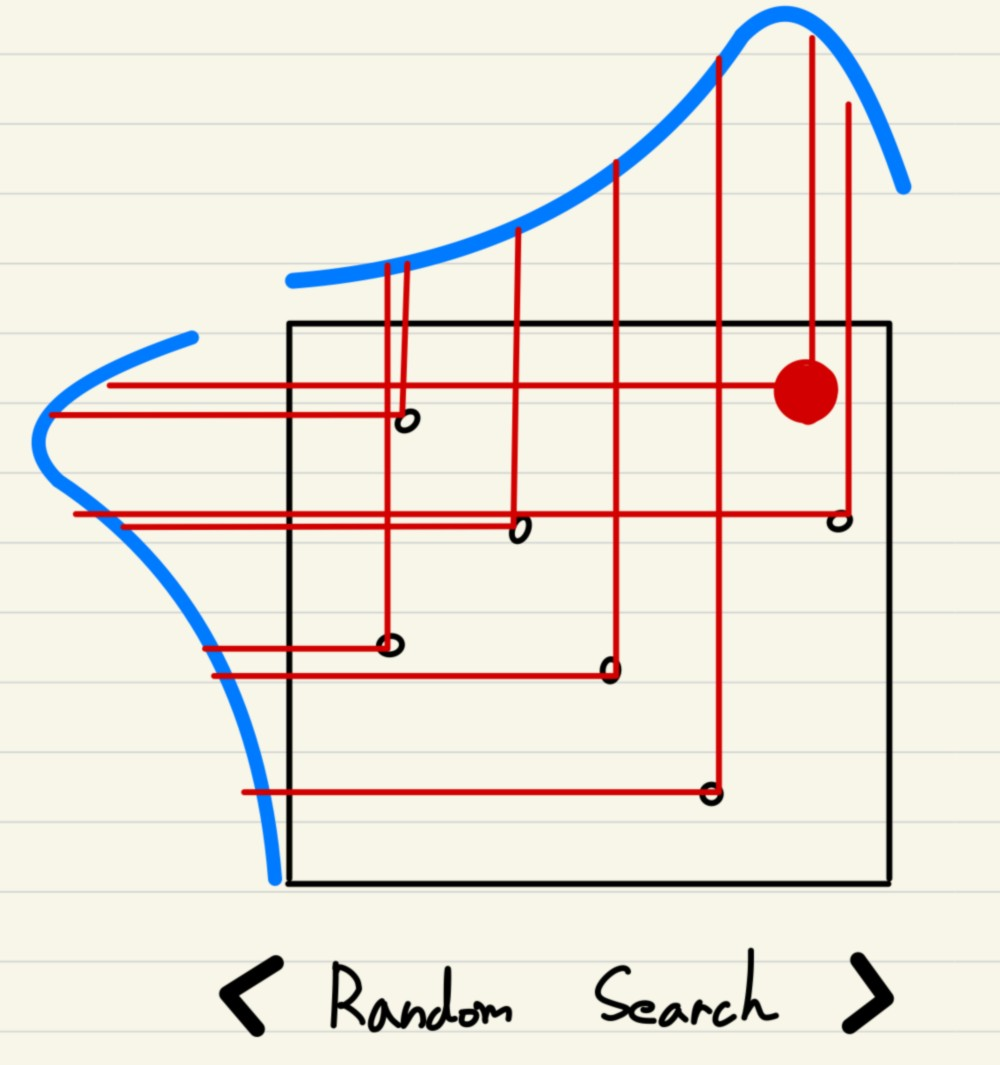


기법 : 사전에 탐색할 값들의 범위를 지정해주고, 그 범위 속에서 가능한 조합을 바탕으로 최고점을 찾아냅니다.
장점 : 
Grid Search에 비해 시간이 짧게 걸린다.
Grid Search보다, 랜덤하게 점들을 찍으니, 성능이 더 좋은 점으로 갈 가능성이 높다.
단점 : 
반대로 성능이 Grid Search보다 낮을 수 있다.
하이퍼 파라미터의 범위가 너무 넓으면, 일반화된 결과가 나오지 않는다. (할 때 마다 달라진다)
seed를 고정하지 않으면, 할 때 마다 결과가 달라진다.
마찬가지로, "최적값 검색"의 느낌이지, "최적화 탐색"의 개념이 아니다.

3.Bayeisan Optimization
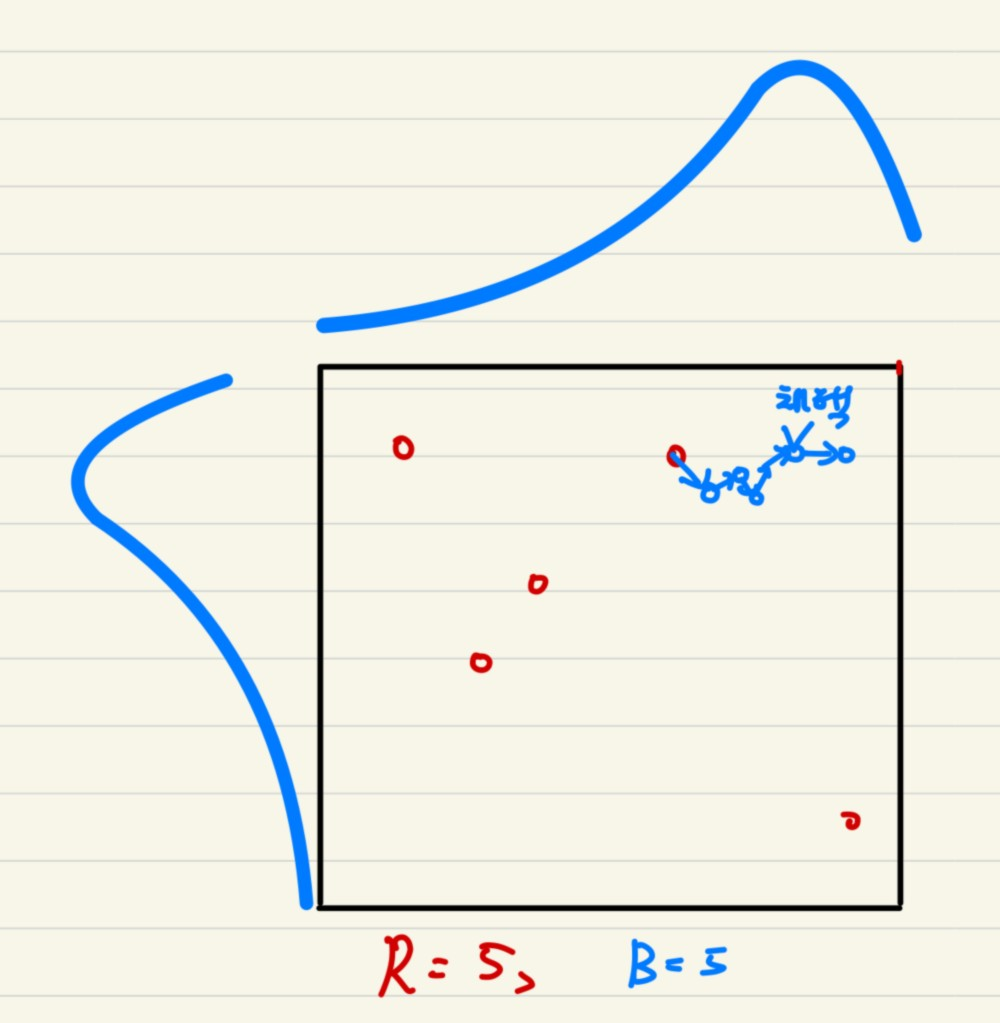


기법 : 하이퍼파라미터의 범위를 지정한 후, Random하게 R 번 탐색한 후, B번 만큼 최적의 값을 찾아간다.
장점 : 
정말 "최적의 값"을 찾아갈 수 있다.
상대적으로 시간이 덜 걸린다.
엔지니어가 그 결과값을 신뢰할 수 있다.
단점 :
Random하게 찍은 값이 달라질 경우, 최적화 하는데 오래 걸릴 수 있다.
Random하게 찍은 값이 부족하면, 최적의 값을 탐색하는게 불가능 할 수 있다.
Rnadom하게 찍은 값이 너무 많으면, 최적화 이전에 이미 최적값을 가지고 있을 수도 있다.
그럼에도, Bayesian Optimization은 수동적으로 하이퍼 파라미터를 튜닝하는데 좋은 결과를 가져온다.